In [1]:
!pip install google-cloud-bigquery google-cloud-bigquery-storage --upgrade

     |████████████████████████████████| 205 kB 939 kB/s            
     |████████████████████████████████| 172 kB 10.7 MB/s            
  Attempting uninstall: google-cloud-bigquery-storage
    Found existing installation: google-cloud-bigquery-storage 2.10.1
    Uninstalling google-cloud-bigquery-storage-2.10.1:
      Successfully uninstalled google-cloud-bigquery-storage-2.10.1
  Attempting uninstall: google-cloud-bigquery
    Found existing installation: google-cloud-bigquery 2.31.0
    Uninstalling google-cloud-bigquery-2.31.0:
      Successfully uninstalled google-cloud-bigquery-2.31.0


In [3]:
# Automatically restart kernel after installs
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)  

{'status': 'ok', 'restart': True}

In [1]:
from google.cloud import bigquery
import pandas as pd
from datetime import datetime, timedelta

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [21]:
%%bigquery --project cryptoprediction-regression 

CREATE OR REPLACE MODEL cryptods01.regression_model

OPTIONS(
  MODEL_TYPE='linear_reg',
  input_label_cols=['Close']
) AS

SELECT 
    distinct Open,Low,High,Close,Volume__Currency_
FROM
  cryptods01.traindata01

Query complete after 0.00s: 100%|██████████| 3/3 [00:00<00:00, 1286.99query/s]                        


""


In [22]:
%%bigquery --project cryptoprediction-regression 

SELECT
  *
FROM
  ML.EVALUATE(MODEL cryptods01.regression_model)

Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.24rows/s]


,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,0.245,0.499,0.000,0.042,1.000,1.000


In [25]:
%%bigquery --project cryptoprediction-regression 

SELECT
  *
FROM
  ML.PREDICT(MODEL `cryptods01.regression_model`,
    (
    SELECT
      open,high,low,close,volume as Volume__Currency_
    FROM
      `cryptoprediction-regression.cryptods01.testdata01`))

Downloading: 100%|██████████| 202/202 [00:00<00:00, 234.90rows/s]


,predicted_Close,open,high,low,close,Volume__Currency_
0,36521.796,36181.000,36562.814,36051.335,36060.126,162459521.622
1,36522.149,36181.000,36562.814,36051.335,36065.905,162796191.801
2,36523.219,36181.000,36562.814,36051.335,36090.631,163815464.407
3,36523.524,36181.000,36562.814,36051.335,36096.949,164106004.210
4,36524.342,36181.000,36562.814,36051.335,36104.206,164885561.726
...,...,...,...,...,...,...
197,36512.978,36114.142,36457.903,36054.160,36415.231,194909746.723
198,36513.130,36114.142,36457.903,36054.160,36420.610,195054350.438
199,36513.565,36114.142,36457.903,36054.160,36410.031,195468622.535
200,36513.887,36114.142,36457.903,36054.160,36396.817,195775661.864


In [24]:
%%bigquery dfplot --project cryptoprediction-regression 

SELECT
  *
FROM
  ML.PREDICT(MODEL `cryptods01.regression_model`,
    (
    SELECT
      open,high,low,close,volume as Volume__Currency_
    FROM
      `cryptoprediction-regression.cryptods01.testdata01`))

Downloading: 100%|██████████| 202/202 [00:00<00:00, 233.00rows/s]


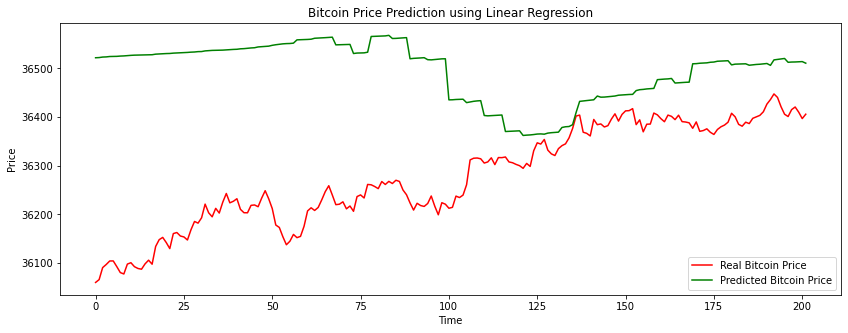

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
Y_test = dfplot['close']
Y_pred = dfplot['predicted_Close']
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using Linear Regression')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()